In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
from fim import apriori

In [2]:
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'pdf')
plt.rcParams.update({'font.size': 12,
                     'xtick.labelsize' : 12,
                     'ytick.labelsize' : 12,
                     'axes.grid': False})
my_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
df = pd.read_pickle('df_filled_minmax.pkl')

## Discretization

In [4]:
# quantili [0., 0.25, 0.50, 0.75, 1.]
# pd.qcut(df[col],4) 4 bins: 
    #1st: all elements in quartile range (0., 0.25]
    #2nd: all elements in quartile range (0.25, 0.50]
    #3rd: all elements in quartile range (0.5, 0.75]
    #4th: all elements in quartile range (0.75, 1.]

qcut_dict = dict.fromkeys(df.columns[1:-2])
for col in df.columns[1:-2]:
    bins = pd.qcut(df[col], 4).unique()
    bins = np.array(bins)
    bins.sort()
    qcut_dict[col] = bins
    df[col] = pd.qcut(df[col], 4, 
                      labels = ['Low_' + col, 'MLow_' + col, 
                                'MHigh_' + col, 'High_' + col])

In [5]:
# per ricostruire gli intervalli dai label
qcut_dict

{'ln(AROU)': array([Interval(0.999, 4.632, closed='right'),
        Interval(4.632, 5.629, closed='right'),
        Interval(5.629, 6.615, closed='right'),
        Interval(6.615, 9.0, closed='right')], dtype=object),
 'VAL': array([Interval(0.999, 4.24, closed='right'),
        Interval(4.24, 5.474, closed='right'),
        Interval(5.474, 6.312, closed='right'),
        Interval(6.312, 9.0, closed='right')], dtype=object),
 'DOM': array([Interval(0.999, 4.22, closed='right'),
        Interval(4.22, 4.959, closed='right'),
        Interval(4.959, 5.552, closed='right'),
        Interval(5.552, 9.0, closed='right')], dtype=object),
 'CNC': array([Interval(0.999, 3.423, closed='right'),
        Interval(3.423, 5.278, closed='right'),
        Interval(5.278, 7.541, closed='right'),
        Interval(7.541, 9.0, closed='right')], dtype=object),
 'IMAG': array([Interval(0.999, 3.74, closed='right'),
        Interval(3.74, 5.52, closed='right'),
        Interval(5.52, 7.603, closed='right'),

In [6]:
df['LEN'] = df['LEN'].astype(str) + '_LEN'
df['POLY'] = df.POLY.map({0:'No_POLY', 1: 'Yes_POLY'})

In [7]:
df['Log(FREQ)'].unique()

array(['very low', 'med', 'low', 'high', 'very high'], dtype=object)

In [8]:
freq_map = {'very low':'VLow',
            'med':'Med',
            'low':'Low',
            'high':'High',
            'very high':'VHigh'}
df['Log(FREQ)'] = df['Log(FREQ)'].map(freq_map)
df['Log(FREQ)'] = df['Log(FREQ)'].astype(str) + '_Log(FREQ)'

In [9]:
df

,LEN,ln(AROU),VAL,DOM,CNC,IMAG,FAM**3,AOA,SIZE,GEND,POLY,Log(FREQ)
word,,,,,,,,,,,,
abattoir,Med_LEN,MLow_ln(AROU),Low_VAL,Low_DOM,MHigh_CNC,MLow_IMAG,Low_FAM**3,High_AOA,MHigh_SIZE,High_GEND,No_POLY,VLow_Log(FREQ)
abbey,Short_LEN,Low_ln(AROU),MHigh_VAL,MLow_DOM,MHigh_CNC,MHigh_IMAG,Low_FAM**3,High_AOA,High_SIZE,Low_GEND,No_POLY,Med_Log(FREQ)
abbreviate,Long_LEN,Low_ln(AROU),MLow_VAL,MHigh_DOM,MLow_CNC,Low_IMAG,MLow_FAM**3,High_AOA,Low_SIZE,MLow_GEND,No_POLY,VLow_Log(FREQ)
abdicate,Med_LEN,MLow_ln(AROU),Low_VAL,Low_DOM,MLow_CNC,Low_IMAG,Low_FAM**3,High_AOA,MHigh_SIZE,High_GEND,No_POLY,VLow_Log(FREQ)
abdication,Long_LEN,Low_ln(AROU),Low_VAL,MLow_DOM,MLow_CNC,Low_IMAG,Low_FAM**3,High_AOA,High_SIZE,MHigh_GEND,No_POLY,VLow_Log(FREQ)
...,...,...,...,...,...,...,...,...,...,...,...,...
zeppelin,Med_LEN,High_ln(AROU),MLow_VAL,MHigh_DOM,High_CNC,High_IMAG,Low_FAM**3,High_AOA,High_SIZE,High_GEND,No_POLY,Med_Log(FREQ)
zero,Short_LEN,MLow_ln(AROU),MLow_VAL,MLow_DOM,Low_CNC,MLow_IMAG,High_FAM**3,Low_AOA,Low_SIZE,MHigh_GEND,No_POLY,High_Log(FREQ)
zest,Short_LEN,High_ln(AROU),High_VAL,High_DOM,MLow_CNC,MLow_IMAG,Low_FAM**3,High_AOA,Low_SIZE,Low_GEND,No_POLY,Low_Log(FREQ)


In [10]:
X = df.values.tolist()

In [11]:
len(X)

4682

In [12]:
X

[['Med_LEN',
  'MLow_ln(AROU)',
  'Low_VAL',
  'Low_DOM',
  'MHigh_CNC',
  'MLow_IMAG',
  'Low_FAM**3',
  'High_AOA',
  'MHigh_SIZE',
  'High_GEND',
  'No_POLY',
  'VLow_Log(FREQ)'],
 ['Short_LEN',
  'Low_ln(AROU)',
  'MHigh_VAL',
  'MLow_DOM',
  'MHigh_CNC',
  'MHigh_IMAG',
  'Low_FAM**3',
  'High_AOA',
  'High_SIZE',
  'Low_GEND',
  'No_POLY',
  'Med_Log(FREQ)'],
 ['Long_LEN',
  'Low_ln(AROU)',
  'MLow_VAL',
  'MHigh_DOM',
  'MLow_CNC',
  'Low_IMAG',
  'MLow_FAM**3',
  'High_AOA',
  'Low_SIZE',
  'MLow_GEND',
  'No_POLY',
  'VLow_Log(FREQ)'],
 ['Med_LEN',
  'MLow_ln(AROU)',
  'Low_VAL',
  'Low_DOM',
  'MLow_CNC',
  'Low_IMAG',
  'Low_FAM**3',
  'High_AOA',
  'MHigh_SIZE',
  'High_GEND',
  'No_POLY',
  'VLow_Log(FREQ)'],
 ['Long_LEN',
  'Low_ln(AROU)',
  'Low_VAL',
  'MLow_DOM',
  'MLow_CNC',
  'Low_IMAG',
  'Low_FAM**3',
  'High_AOA',
  'High_SIZE',
  'MHigh_GEND',
  'No_POLY',
  'VLow_Log(FREQ)'],
 ['Med_LEN',
  'MHigh_ln(AROU)',
  'MHigh_VAL',
  'MHigh_DOM',
  'High_CNC',
  'High_I

## Patter Mining

In [11]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [13]:
# extract all frequent itemsets (trarget = 's')
# extract closed frequent itemsets (target = 'c')
# extract maximal frequent itemsets (target 'm')
# support itemset threshold (supp = integer) # i.e. supp=20 stay for 20%
# minimum number of items per itemset (zmin = k) # i.e. only itemsets >= k-itemsets
# for evaluation (report = 'S') 'S' stays for support


itemsets = apriori(X, target='a', supp=25, zmin=2, report='S')

In [14]:
# numero di itemsets con un support al >= 2% 

len(itemsets)

3

In [15]:
# first 5 frequent itemsets
# sintax -> list of tuples composed by 2 elements: tuple itemset, evaluation measure
# es. ((itemset), eval measure) 

itemsets[:5]

[(('Med_Log(FREQ)', 'No_POLY'), 27.082443400256302),
 (('Short_LEN', 'No_POLY'), 32.20845792396412),
 (('Med_LEN', 'No_POLY'), 44.80991029474583)]

In [16]:
# first itemset

itemsets[0][0]

('Med_Log(FREQ)', 'No_POLY')

In [17]:
# support of the first itemset

itemsets[0][1]

27.082443400256302

In [18]:
# distribuzione del support

apriori_output = apriori(X, target = 'a', supp = 2, report='S')
supports = np.array([support for itemset, support in apriori_output]).round(1)

In [19]:
supports.size

8478

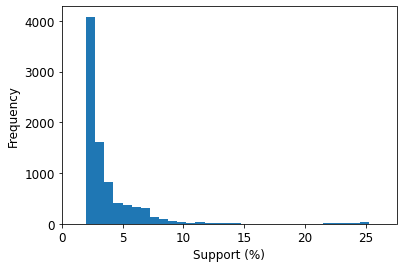

In [20]:
# distribuzione degli itemset con support > minsup=2%

my_ser = pd.Series(supports)
my_ser.plot.hist(bins=120)
# my_ser.plot.kde()
plt.yticks(np.arange(0,4001, 1000))
plt.xlabel('Support (%)')
plt.xlim(0,27.5)
plt.show()

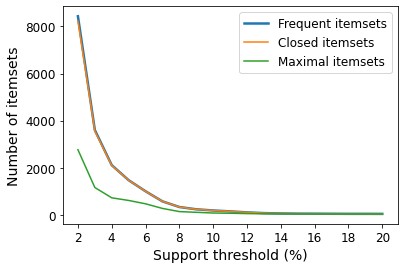

In [20]:
# we want to count the number of all frequent itemsets and the number of  
# maximal frequent itemsets according to the support value
# stiamo semplicemente vedendo che l'insieme dei maximal frequent itemset
# è un sottoinsieme dei frequent itemset

freq_itemsets_num = []
closed_itemsets_num = []
max_itemsets_num = []
min_supp = 2
max_supp = 21
for support in range(min_supp, max_supp):
    freq_itemsets = apriori(X, target='a', supp=support, zmin=2)
    closed_itemsets = apriori(X, target='c', supp=support, zmin=2)
    max_itemsets = apriori(X, target='m', supp=support, zmin=2)
    freq_itemsets_num.append(len(freq_itemsets)) 
    closed_itemsets_num.append(len(closed_itemsets)) 
    max_itemsets_num.append(len(max_itemsets))  
    
plt.plot(range(min_supp,max_supp), freq_itemsets_num, label='Frequent itemsets', lw = 2.5)
plt.plot(range(min_supp,max_supp), closed_itemsets_num, label='Closed itemsets')
plt.plot(range(min_supp,max_supp), max_itemsets_num, label='Maximal itemsets')
plt.legend()
plt.xticks(range(min_supp, max_supp, 2))
plt.xlabel('Support threshold (%)', fontsize=14)
plt.ylabel('Number of itemsets', fontsize=14)

plt.savefig('n_itemsets_th.pdf', format='pdf',bbox_inches='tight')
plt.show()

In [21]:
print(freq_itemsets_num,closed_itemsets_num,
      max_itemsets_num, sep='\n\n')

[8432, 3602, 2110, 1472, 1001, 573, 333, 236, 186, 148, 105, 74, 60, 51, 49, 46, 43, 43, 41]

[8222, 3555, 2097, 1469, 1000, 573, 333, 236, 186, 148, 105, 74, 60, 51, 49, 46, 43, 43, 41]

[2767, 1162, 723, 612, 469, 273, 139, 108, 78, 69, 53, 45, 40, 42, 40, 40, 40, 40, 41]


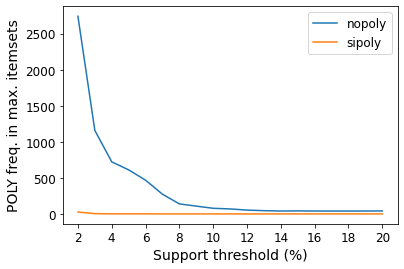

In [22]:
# studiamo the number of maximal itemsets containing poly
# and no poly words

sipoly_count = []
nopoly_count = []
# sipoly_supp_mean = []
# nopoly_supp_mean = []
min_supp = 2
max_supp = 21
for support in range(min_supp, max_supp):
#     sipoly_supp = []
#     nopoly_supp = []
    sipoly_itemsets = []
    nopoly_itemsets = []
    max_itemsets = apriori(X, target='m', supp=support, zmin=2, report='S')
    for itemset, measure in max_itemsets:
        if 'sipoly' in itemset:
            sipoly_itemsets.append(itemset)
#             sipoly_supp.append(measure)
        else:
            nopoly_itemsets.append(itemset)
#             nopoly_supp.append(measure)   
#     if sipoly_supp:
#         sipoly_supp_mean.append(mean_supp)
#     else:    
#         sipoly_supp_mean.append(0)
        
#     if nopoly_supp:
#         nopoly_supp_mean.append(np.nanmean(nopoly_supp))
#     else:    
#         nopoly_supp_mean.append(0)
        
    sipoly_count.append(len(sipoly_itemsets))
    nopoly_count.append(len(nopoly_itemsets))
    
# print(sipoly_supp_mean, nopoly_supp_mean, sep='\n\n', end='\n\n')
# print(sipoly_count, nopoly_count, sep='\n\n')


plt.plot(range(min_supp, max_supp), nopoly_count, label='nopoly')
plt.plot(range(min_supp, max_supp), sipoly_count, label='sipoly')
plt.legend()
plt.xticks(range(min_supp, max_supp, 2))
plt.xlabel('Support threshold (%)', fontsize=14)
plt.ylabel('POLY freq. in max. itemsets', fontsize=14)

plt.show()

# plt.plot(range(min_supp, max_supp), nopoly_supp_mean, label='nopoly')
# plt.plot(range(min_supp, max_supp), sipoly_supp_mean, label='sipoly')
# plt.legend()
# plt.xticks(range(min_supp, max_supp, 2))
# plt.xlabel('Support threshold (%)', fontsize=14)
# plt.ylabel('Support mean', fontsize=14)

# plt.show()

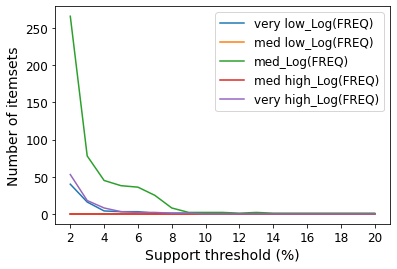

In [23]:
# uguale a sopra, ma qui studiamo i closed

filter_1 = []
filter_2 = []
filter_3 = []
filter_4 = []
filter_5 = []

min_supp = 2
max_supp = 21
for support in range(min_supp, max_supp):
    max_itemsets = apriori(X, target='m', supp=support, zmin=2)   
    filter_1.append(len([item for item in max_itemsets if 'very low_Log(FREQ)' in item[0]]))
    filter_2.append(len([item for item in max_itemsets if 'med low_Log(FREQ)' in item[0]]))
    filter_3.append(len([item for item in max_itemsets if 'med_Log(FREQ)' in item[0]]))
    filter_4.append(len([item for item in max_itemsets if 'med high_Log(FREQ)' in item[0]]))
    filter_5.append(len([item for item in max_itemsets if 'very high_Log(FREQ)' in item[0]]))
    
plt.plot(range(min_supp, max_supp), filter_1, label='very low_Log(FREQ)')
plt.plot(range(min_supp, max_supp), filter_2, label='med low_Log(FREQ)')
plt.plot(range(min_supp, max_supp), filter_3, label='med_Log(FREQ)')
plt.plot(range(min_supp, max_supp), filter_4, label='med high_Log(FREQ)')
plt.plot(range(min_supp, max_supp), filter_5, label='very high_Log(FREQ)')
plt.legend()
plt.xticks(range(min_supp, max_supp, 2))
plt.xlabel('Support threshold (%)', fontsize=14)
plt.ylabel('Number of itemsets', fontsize=14)
plt.savefig('freq_maximal_itemsets.pdf', format='pdf',bbox_inches='tight')
plt.show()

### Association Rules (AR)

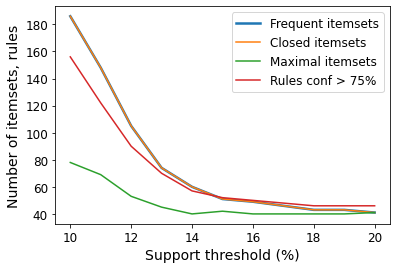

In [24]:
freq_itemsets_num = []
closed_itemsets_num = []
max_itemsets_num = []
conf_rules = []
min_supp = 10
max_supp = 21
conf_th = 75
for support in range(min_supp, max_supp):
    freq_itemsets = apriori(X, target='a', supp=support, zmin=2)
    closed_itemsets = apriori(X, target='c', supp=support, zmin=2)
    max_itemsets = apriori(X, target='m', supp=support, zmin=2)
    rules = apriori(X, target='r', supp=support, zmin=2, conf=conf_th)
    freq_itemsets_num.append(len(freq_itemsets)) 
    closed_itemsets_num.append(len(closed_itemsets)) 
    max_itemsets_num.append(len(max_itemsets))  
    conf_rules.append(len(rules))

# min_conf = 50
# max_conf = 91
# for conf in range(min_conf, max_conf, 2):
    
plt.plot(range(min_supp,max_supp), freq_itemsets_num, label='Frequent itemsets', lw = 2.5)
plt.plot(range(min_supp,max_supp), closed_itemsets_num, label='Closed itemsets')
plt.plot(range(min_supp,max_supp), max_itemsets_num, label='Maximal itemsets')
plt.plot(range(min_supp,max_supp), conf_rules, label=f'Rules conf > {conf_th}%')

plt.legend()
plt.xticks(range(min_supp, max_supp, 2))
plt.xlabel('Support threshold (%)', fontsize=14)
plt.ylabel('Number of itemsets, rules', fontsize=14)

plt.show()

In [32]:
conf_lst = []
supp_lst = []
list_lst = []
for s in range(2, 23):
    for c in range(60, 81):
        rules = apriori(X, target='r', supp=s, zmin=3, conf=c, report='SCl')
        for rule in rules: 
            supp_lst.append(rule[2])
            conf_lst.append(rule[3])
            list_lst.append(rule[4])

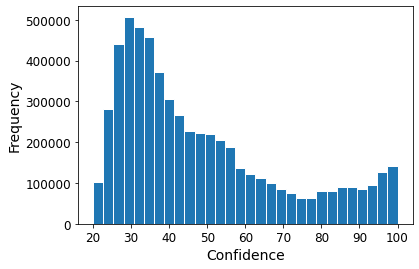

In [341]:
## range (20,81)
plt.figure(figsize=(6,4))
plt.hist(conf_lst, bins = 30, edgecolor='w')
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Confidence', fontsize=14)
# plt.savefig('conf_hist.pdf', format='pdf',bbox_inches='tight')
plt.show()

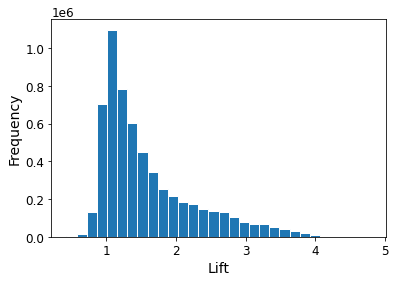

In [342]:
## range (20,81)

plt.figure(figsize=(6,4))
plt.hist(list_lst, bins = 30, edgecolor='w')
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Lift', fontsize=14)
# plt.savefig('lift_hist.pdf', format='pdf',bbox_inches='tight')
plt.show()

In [350]:
len(conf_lst)

379152

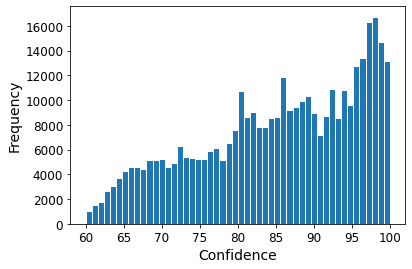

In [347]:
plt.figure(figsize=(6,4))
plt.hist(conf_lst, bins = 50, edgecolor='w')
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Confidence', fontsize=14)
# plt.savefig('conf_hist.pdf', format='pdf',bbox_inches='tight')
plt.show()

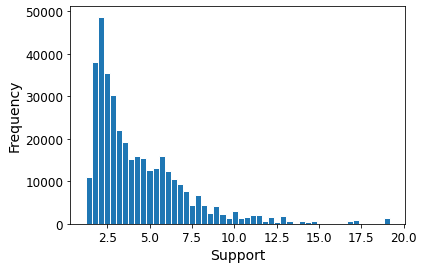

In [348]:
plt.figure(figsize=(6,4))
plt.hist(supp_lst, bins = 50, edgecolor='w')
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Support', fontsize=14)
plt.show()

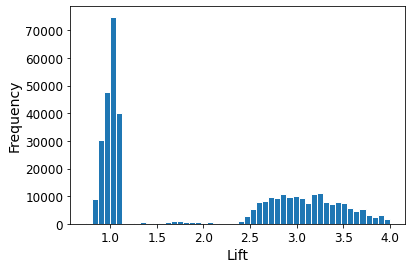

In [349]:
plt.figure(figsize=(6,4))
plt.hist(list_lst, bins = 50, edgecolor='w')
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Lift', fontsize=14)
# plt.savefig('lift_hist.pdf', format='pdf',bbox_inches='tight')
plt.show()

In [21]:
def report(rules):
    '''
    rules is the output of apriori(X,target='r',...,report='ascl')
    rules syntax: (Y, X, measure1, measure2, measure3, measure4)
    '''
    
    cols = 'Antecedent Consequent Support_Count Support Confidence Lift'.split()
    rules_df = pd.DataFrame(columns=cols)
    for Y, X, s_count, s, c, l in rules:
        new_row = X, Y, s_count, round(s,1), round(c,1), round(l,1)
        new_row = dict(zip(cols, new_row))
        rules_df = rules_df.append(new_row, ignore_index=True)
    return rules_df

def print_rules(rules, n=None):
    '''
    print first n rules
    '''
    if n != None:
        for i in range(n):
            print(rules[i][1], '-->', rules[i][0])
    # if you only pass in input one rule
    else: print(rules[1], '-->', rules[0])

In [22]:
rules = apriori(X, target='r', supp=24, zmin=3, conf=61, 
                report='aSCl')

In [23]:
df_rules = report(rules)

In [24]:
df_rules.shape

(3, 6)

In [25]:
df_rules.head()

,Antecedent,Consequent,Support_Count,Support,Confidence,Lift
0,"(Low_FAM**3, No_POLY)",High_AOA,691,14.8,61.4,2.5
1,"(Low_CNC, No_POLY)",Low_IMAG,784,16.7,68.9,2.8
2,"(Low_DOM, No_POLY)",Low_VAL,811,17.3,71.6,2.9


In [26]:
# first 5 rules

print_rules(rules, 3)

('Low_FAM**3', 'No_POLY') --> High_AOA
('Low_CNC', 'No_POLY') --> Low_IMAG
('Low_DOM', 'No_POLY') --> Low_VAL


In [27]:
df_high_lift = df_rules.loc[df_rules['Lift'] > 1.5, :] 
df_high_lift

,Antecedent,Consequent,Support_Count,Support,Confidence,Lift
0,"(Low_FAM**3, No_POLY)",High_AOA,691,14.8,61.4,2.5
1,"(Low_CNC, No_POLY)",Low_IMAG,784,16.7,68.9,2.8
2,"(Low_DOM, No_POLY)",Low_VAL,811,17.3,71.6,2.9


In [28]:
rules = apriori(X, target='r', supp=2, zmin=3, conf=30, 
                report='aSCl')

In [29]:
df_rules = report(rules)

In [30]:
df_rules.loc[df_rules['Lift'] > 4.6, :] 

,Antecedent,Consequent,Support_Count,Support,Confidence,Lift
899,"(MLow_ln(AROU), Low_VAL, Low_FAM**3, No_POLY)",VLow_Log(FREQ),53,1.1,53.0,4.7
2814,"(High_SIZE, High_FAM**3, Short_LEN, No_POLY)",VHigh_Log(FREQ),54,1.2,57.4,4.8
2816,"(High_SIZE, High_FAM**3, Short_LEN)",VHigh_Log(FREQ),63,1.3,57.8,4.8


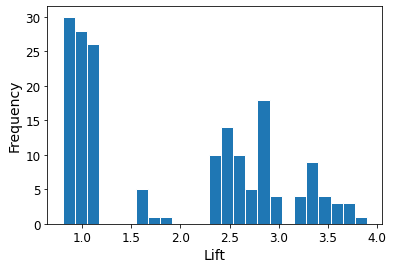

In [42]:
df_rules['Lift'].hist(grid=False, bins = 25,edgecolor='w')
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Lift', fontsize=14)
plt.show()

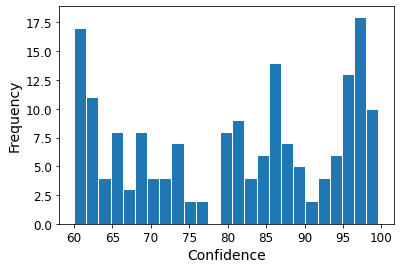

In [43]:
plt.figure(figsize=(6,4))
df_rules['Confidence'].hist(grid=False, bins = 25,edgecolor='w')
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Confidence', fontsize=14)
plt.show()

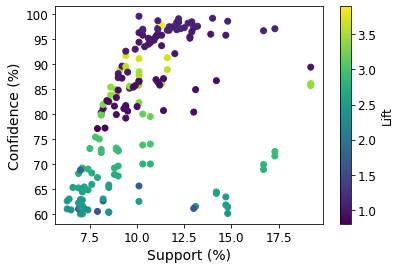

In [44]:
plt.figure(figsize=(6,4))
plt.scatter(df_rules['Support'], df_rules['Confidence'],
           c=df_rules['Lift'], cmap='viridis')
plt.colorbar(label="Lift")
plt.ylabel('Confidence (%)', fontsize=14)
plt.xlabel('Support (%)', fontsize=14)
plt.show()

In [343]:
# per ogni coppia (support th., confidence th.) quante regole troviamo 

num_rules = []
for support in range(2, 23):
    num_rules_since_support = []
    for confidence in range(20, 81): 
        rules = apriori(X, target='r', supp=support, zmin=2, conf=confidence, report='ascl')
        num_rules_since_support.append(len(rules))       
    num_rules.append(num_rules_since_support)

In [621]:
np.array(num_rules)

array([[13332, 12681, 12153, 11665, 11154, 10713, 10276,  9852,  9513,
         9150,  8835,  8530,  8219,  7944,  7691,  7438,  7169,  6892,
         6644,  6399,  6153],
       [ 5220,  4971,  4766,  4582,  4381,  4211,  4014,  3841,  3704,
         3560,  3447,  3336,  3229,  3119,  3021,  2935,  2853,  2759,
         2682,  2606,  2523],
       [ 2831,  2697,  2581,  2477,  2364,  2257,  2142,  2039,  1969,
         1885,  1818,  1775,  1727,  1670,  1635,  1605,  1567,  1528,
         1496,  1465,  1423],
       [ 1849,  1765,  1689,  1636,  1574,  1504,  1425,  1357,  1311,
         1266,  1221,  1198,  1169,  1119,  1097,  1075,  1053,  1029,
         1015,  1002,   975],
       [ 1299,  1246,  1204,  1170,  1128,  1080,  1025,   972,   941,
          912,   872,   851,   825,   787,   770,   757,   741,   728,
          719,   711,   690],
       [  785,   751,   725,   707,   680,   651,   617,   584,   570,
          555,   530,   522,   513,   491,   480,   472,   463,   455

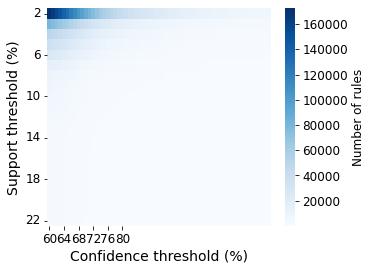

In [344]:
plt.figure(figsize=(5,4))
hmap = sns.heatmap(num_rules, cmap = 'Blues',
            cbar_kws={'label':'Number of rules'})
# # hmap.set_xticklabels([a,b,c])
# hmap.set_yticklabels([1,2,3])
plt.xticks(np.arange(0.5,21,4), np.arange(60,81,4), rotation=0) 
plt.yticks(np.arange(0.5,21,4), np.arange(2,23,4), rotation=0) 
plt.ylabel('Support threshold (%)', fontsize=14)
plt.xlabel('Confidence threshold (%)', fontsize=14)
plt.savefig('rules_heatmap.pdf', format='pdf',bbox_inches='tight')
plt.show() 

## 'Prediction' with AR 

### preprocessing over the test set

In [ ]:
# left for exercise

# using the same test set for classification (w/ random_state):
# predict the target variable with the most interesting rule:
# .... e.g., the most frequent;
# .... e.g., the one w/ max lift
# build a list of prediction, e.g. ['Survived', 'Not Survived', 'Survived']
# evaluate this prediction with precision/recall/confusion matrix etc.

In [78]:
# load test set

X_test = np.load('test_set_classification.npy')
y_test = np.load('y_test_set_classification.npy')

In [79]:
X_test.shape, y_test.shape

((1405, 11), (1405,))

In [80]:
test_attr = df.columns[:-2].tolist()+['Log(FREQ)']
df_test = pd.DataFrame(X_test, columns=test_attr)

In [81]:
df_test

,LEN,ln(AROU),VAL,DOM,CNC,IMAG,FAM**3,AOA,SIZE,GEND,Log(FREQ)
0,3.285714,4.213697,3.441906,3.727216,2.766880,1.916218,1.372447,8.561892,4.700199,5.192263,2.726923
1,3.285714,5.687931,6.069712,4.183826,4.868729,5.473482,5.747710,6.258693,8.135994,6.014905,6.448760
2,3.285714,7.834787,7.073782,6.283981,3.153150,4.910838,2.604910,6.976356,6.796641,3.465249,3.832666
3,3.285714,5.051740,5.894315,5.320995,4.837043,3.659493,1.207739,7.556328,5.191439,3.589851,4.398776
4,2.142857,4.319562,4.915452,4.844479,7.895511,7.553420,5.975344,4.254520,2.413040,6.123430,6.210701
...,...,...,...,...,...,...,...,...,...,...,...
1400,2.714286,7.113980,6.930944,4.339347,7.052056,7.948501,6.968555,2.602225,8.342604,5.101156,7.968458
1401,6.142857,4.105862,5.138112,4.440124,5.903810,4.478862,5.378869,4.867872,4.223406,4.516999,5.797408
1402,3.285714,4.677064,6.028751,4.659098,2.347416,2.037663,4.303944,6.872045,3.177352,3.923463,5.012151
1403,3.285714,6.751500,6.795458,5.661897,8.606186,8.666410,7.358406,3.771905,4.656854,6.311003,6.328407


In [82]:
df_test['LEN'] = pd.cut(df_test['LEN'], [1,3,4.43,9], 
       labels=["Short_LEN", "Med_LEN", "Large_LEN"])

In [83]:
df1 = pd.read_pickle('df_filled.pkl')

In [84]:
# normalizzo i valori degli intervalli perché X_test è normalizzato

def f(lst):
    arr = np.array(lst)
    arr = arr - df1['Log(FREQ)'].min()
    arr = arr * 8 / (df1['Log(FREQ)'].max() - df1['Log(FREQ)'].min())
    arr = arr + 1
    return list(arr)

In [85]:
bin_int = f([4.1,5.81,6.48,7.09,7.77,9.31])

In [86]:
df_test['Log(FREQ)'] = pd.cut(df_test['Log(FREQ)'], bin_int,
       labels=['very low_Log(FREQ)', 'low_Log(FREQ)', 'med_Log(FREQ)',
       'high_Log(FREQ)', 'very high_Log(FREQ)'])

In [87]:
# trasformo tutte i valori negli appositi intervalli

for col in df_test.columns[1:-1]:
    lst = df_test[col].values
    new_values = []
    for i in range(len(lst)):
        for rg in qcut_dict[col]:
            if lst[i] in rg:
                new_values.append(rg)
                break
    df_test[col] = new_values

In [88]:
for col in df_test.columns[1:-1]:
    cat_val =['Low_' + col, 'MedL_' + col, 'MedH_' + col, 'High_' + col]
    map_new_val = dict(zip(np.unique(df_test[col]), cat_val))
    df_test[col] = df_test[col].map(map_new_val)

In [89]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([1291,  114], dtype=int64))

In [90]:
y_true = []
for i in range(y_test.size):
    if y_test[i] == 0:
        y_true.append('nopoly')
    else:
        y_true.append('sipoly')
y_true

['nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'sipoly',
 'nopoly',
 'nopoly',
 'sipoly',
 'sipoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'sipoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'sipoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'sipoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'sipoly',
 'nopoly',
 'nopoly',
 'nopoly',
 'nopoly',

In [91]:
df_test

,LEN,ln(AROU),VAL,DOM,CNC,IMAG,FAM**3,AOA,SIZE,GEND,Log(FREQ)
0,Med_LEN,Low_ln(AROU),Low_VAL,Low_DOM,Low_CNC,Low_IMAG,Low_FAM**3,High_AOA,MedL_SIZE,MedH_GEND,very low_Log(FREQ)
1,Med_LEN,MedH_ln(AROU),MedH_VAL,Low_DOM,MedL_CNC,MedL_IMAG,MedH_FAM**3,MedH_AOA,High_SIZE,High_GEND,high_Log(FREQ)
2,Med_LEN,High_ln(AROU),High_VAL,High_DOM,Low_CNC,MedL_IMAG,Low_FAM**3,High_AOA,High_SIZE,Low_GEND,low_Log(FREQ)
3,Med_LEN,MedL_ln(AROU),MedH_VAL,MedH_DOM,MedL_CNC,Low_IMAG,Low_FAM**3,High_AOA,MedH_SIZE,Low_GEND,low_Log(FREQ)
4,Short_LEN,Low_ln(AROU),MedL_VAL,MedL_DOM,High_CNC,MedH_IMAG,MedH_FAM**3,MedL_AOA,Low_SIZE,High_GEND,high_Log(FREQ)
...,...,...,...,...,...,...,...,...,...,...,...
1400,Short_LEN,High_ln(AROU),High_VAL,MedL_DOM,MedH_CNC,High_IMAG,High_FAM**3,Low_AOA,High_SIZE,MedL_GEND,very high_Log(FREQ)
1401,Large_LEN,Low_ln(AROU),MedL_VAL,MedL_DOM,MedH_CNC,MedL_IMAG,MedH_FAM**3,MedL_AOA,MedL_SIZE,MedL_GEND,high_Log(FREQ)
1402,Med_LEN,MedL_ln(AROU),MedH_VAL,MedL_DOM,Low_CNC,Low_IMAG,MedL_FAM**3,High_AOA,Low_SIZE,Low_GEND,med_Log(FREQ)
1403,Med_LEN,High_ln(AROU),High_VAL,High_DOM,High_CNC,High_IMAG,High_FAM**3,MedL_AOA,MedL_SIZE,High_GEND,high_Log(FREQ)


### 'prediction'

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
X_test = df_test.values

In [648]:
rules = apriori(X, target='r', supp=1, zmin=2, conf=40, report='aSCl')

In [649]:
# regola con la confidence più alta

for r in rules:
    if r[0] == 'sipoly':
        print_rules(r)

('high_Log(FREQ)', 'High_CNC', 'High_IMAG', 'Low_ln(AROU)', 'Short_LEN') --> sipoly


In [94]:
antec = ['high_Log(FREQ)', 'High_CNC', 'High_IMAG', 
         'Low_ln(AROU)', 'Short_LEN']
attr = ['Log(FREQ)', 'CNC', 'IMAG', 'ln(AROU)', 'LEN']
y_pred = []
arr_test = df_test.loc[:, attr].values
idx = []
for i in range(arr_test.shape[0]):
    if (arr_test[i] == np.array(antec)).all():
        idx.append(i)

In [95]:
y_pred = []
for i in range(len(y_test)):
    if i in idx:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred = np.array(y_pred)

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1291
           1       0.29      0.04      0.08       114

    accuracy                           0.91      1405
   macro avg       0.61      0.52      0.52      1405
weighted avg       0.87      0.91      0.88      1405



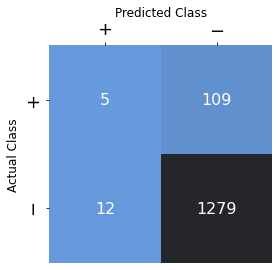

array([[   5,  109],
       [  12, 1279]], dtype=int64)

In [589]:
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
sns.heatmap(cm, annot = True, fmt='0', cbar=False, 
            cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True), annot_kws={"fontsize":16})
plt.xticks([0.5,1.5], [r'+', r'$-$'], fontsize = 18)
plt.yticks([0.5,1.5], [r'+', r'$-$'], fontsize = 18)
plt.xlabel('Predicted Class', fontsize = 12)
plt.ylabel('Actual Class', fontsize = 12)
ax = plt.gca()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.show()
plt.show()
cm

In [310]:
rules = apriori(X, target='r', supp=40, zmin=2, conf=1, report='ascl')

In [311]:
# regola con il support più alto

for r in rules:
    if r[0] == 'sipoly':
        print_rules(r)

('Med_LEN',) --> sipoly


In [590]:
antec = ['Med_LEN']
y_pred = []
arr_test = df_test.loc[:, 'LEN'].values
idx = []
for i in range(arr_test.shape[0]):
    if (arr_test[i] == np.array(antec)).all():
        idx.append(i)

In [591]:
y_pred = []
for i in range(len(y_test)):
    if i in idx:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred = np.array(y_pred)

In [592]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.51      0.64      1291
           1       0.04      0.22      0.06       114

    accuracy                           0.48      1405
   macro avg       0.46      0.36      0.35      1405
weighted avg       0.81      0.48      0.60      1405



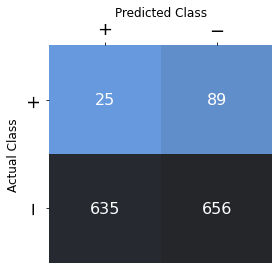

array([[ 25,  89],
       [635, 656]], dtype=int64)

In [593]:
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
sns.heatmap(cm, annot = True, fmt='0', cbar=False, 
            cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True), annot_kws={"fontsize":16})
plt.xticks([0.5,1.5], [r'+', r'$-$'], fontsize = 18)
plt.yticks([0.5,1.5], [r'+', r'$-$'], fontsize = 18)
plt.xlabel('Predicted Class', fontsize = 12)
plt.ylabel('Actual Class', fontsize = 12)
ax = plt.gca()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.show()
plt.show()
cm

In [341]:
rules = apriori(X, target='r', supp=1, zmin=2, conf=1, report='ascl')

In [342]:
# regola con max lift

max_rule = None
max_lift = -np.inf

for r in rules:
    if r[0] == 'sipoly' and r[5] > max_lift:
            max_rule = r
            max_lift = r[5]
print_rules(max_rule)

('high_Log(FREQ)', 'High_CNC', 'High_IMAG', 'Low_ln(AROU)', 'Short_LEN') --> sipoly


è uguale alla prima regola trovata.